In [4]:

import pandas as pd
import os
import matplotlib.pyplot as plt
from facebook_scraper import get_posts
import numpy as np
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
posteosYaku = []
for post in get_posts('yakuperezoficial', pages=4):
        post['Word count'] = len(post['text'])
        posteosYaku.append(post)          
posteosYaku = pd.DataFrame(posteosYaku)

In [14]:
posteosNoboa = []
for post in get_posts('AlvaroNoboaPonton', pages=4):
        post['Word count'] = len(post['text'])
        posteosNoboa.append(post)          
posteosNoboa = pd.DataFrame(posteosNoboa)

In [19]:
import plotly
from plotly.graph_objs import Scatter, Layout
likesYaku = posteosYaku['likes']
likesNoboa = posteosNoboa['likes']

plotly.offline.plot({
    "data": [Scatter(x = likesYaku, y=likesNoboa)],
    "layout": Layout(title="Likes")
})
#se abre una imagen

zsh:1: number expected


array([[<AxesSubplot:title={'center':'likes'}>,
        <AxesSubplot:title={'center':'comments'}>],
       [<AxesSubplot:title={'center':'shares'}>,
        <AxesSubplot:title={'center':'Word count'}>]], dtype=object)

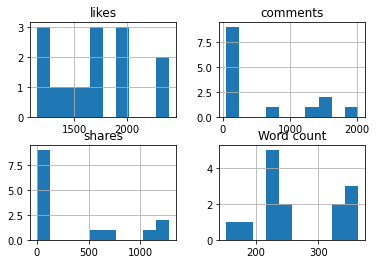

In [27]:
posteosYaku.drop(['post_id','post_url', 'time'],1).hist()

array([[<AxesSubplot:title={'center':'likes'}>,
        <AxesSubplot:title={'center':'comments'}>],
       [<AxesSubplot:title={'center':'shares'}>,
        <AxesSubplot:title={'center':'Word count'}>]], dtype=object)

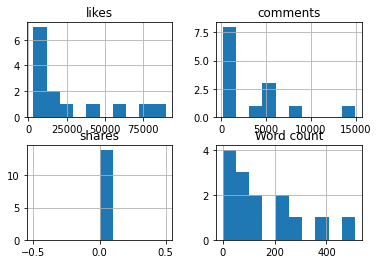

In [28]:
posteosNoboa.drop(['post_id','post_url', 'time'],1).hist()

In [91]:
y = np.array(likesYaku)
x = np.array(range(0, len(y)))
regresionYaku = linear_model.LinearRegression()
regresionYaku.fit(x.reshape(-1, 1), y)

#prediccion
prediccion = regresionYaku.predict(x.reshape(-1, 1))
regresionYaku.coef_

array([-50.59120879])

In [92]:
mean_squared_error(x.reshape(-1, 1), y)

3022982.0

In [94]:
yn = np.array(likesNoboa)
xn = np.array(range(0, len(yn)))
regresionNoboa = linear_model.LinearRegression()
regresionNoboa.fit(xn.reshape(-1, 1), yn)

#prediccion
prediccion = regresionNoboa.predict(xn.reshape(-1, 1))
regresionNoboa.coef_

array([1774.86593407])

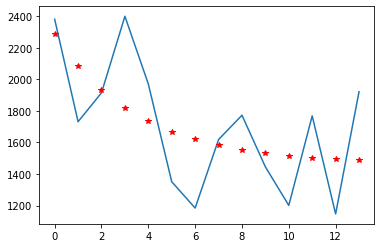

In [90]:
from scipy.optimize import curve_fit

def reg_exponencial(x, c0, c1, c2, c3):
    return c0 * np.exp(-c1 * x) + c2 + c3

g = [100, 0.001, 10, 0.001]
pre = np.empty(len(y))
for i in range(len(y)):
    pre[i] = reg_exponencial(x[i], g[0], g[1], g[2], g[3])
    
popt, pcov = curve_fit(reg_exponencial, x, y, g)
for i in range(len(y)):
    pre[i] = reg_exponencial(x[i], popt[0], popt[1], popt[2], popt[3])
plt.plot(x, y)
plt.plot(x, pre, 'r*')

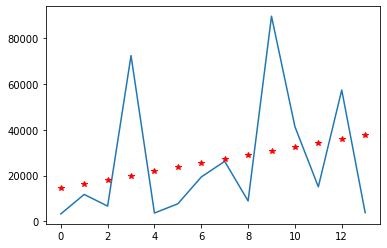

In [97]:
def reg_exponencial(xn, c0, c1, c2, c3):
    return c0 * np.exp(-c1 * xn) + c2 + c3

g = [100, 0.001, 10, 0.001]
pre = np.empty(len(y))
for i in range(len(y)):
    pre[i] = reg_exponencial(xn[i], g[0], g[1], g[2], g[3])
    
popt, pcov = curve_fit(reg_exponencial, xn, yn, g)
for i in range(len(yn)):
    pre[i] = reg_exponencial(xn[i], popt[0], popt[1], popt[2], popt[3])
plt.plot(xn, yn)
plt.plot(xn, pre, 'r*')